In [4]:
# HOME
import os
import scipy
# get the code
import sys
sys.path.append('../code')
from plot import plot_genomic


home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [5]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

# combined hetSNP and covDiv ---> rollCov + CovSNP
+ rolling log2ratio on the combined covDiv
+ merging into the hetSNP data and interpolation of rolling log2ratio at hetSNP positions

### get the coverage and SNP data

In [6]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, 'heteroSNP/01_A.snp'), sep='\t')
cov_df = pd.read_csv(os.path.join(output_path, 'covDif/01_A.cov'), sep='\t')

## run the code

In [40]:
from rollingCNV import apply_rolling_coverage

config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'diff_exp': 4, # the exponent for the diff function --> higher values make steeper peaks
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 40,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':250
            }
        }
    }
}

snpcov_df, rolling_cov_df = apply_rolling_coverage(snp_df, cov_df, config)
snpcov_df.to_csv(os.path.join(output_path, 'rollingCNV/01_A.snpcov.csv'), sep='\t', index=False)
rolling_cov_df.to_csv(os.path.join(output_path, 'rollingCNV/01_A.rollcov.csv'), sep='\t', index=False)

## CovDiv rolling window

In [7]:
cov_df[:3]

Chr    Pos  FullExonPos  ExonPos  Coverage  PONmeanCov  PONmedianCov  \
0  chr1  12650          220      220  0.103468    0.007240           0.0   
1  chr1  12700          270      270  0.232804    0.029561           0.0   
2  chr1  12750          320      320  0.615638    0.015033           0.0   

     PONstd  log2ratio  
0  0.024945   3.836977  
1  0.081585   2.977339  
2  0.049342   5.355868

In [8]:
cov_df.sort_values('FullExonPos')[:10]

Chr    Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  PONmedianCov  \
96610  chr1  12600          170      170   0.000000    0.000000      0.000000   
0      chr1  12650          220      220   0.103468    0.007240      0.000000   
1      chr1  12700          270      270   0.232804    0.029561      0.000000   
2      chr1  12750          320      320   0.615638    0.015033      0.000000   
3      chr1  13450          365      365  21.384350   11.320374     10.811050   
4      chr1  13500          415      415  27.587286   15.962807     15.962807   
5      chr1  13550          465      465  32.023497   19.287508     20.464653   
6      chr1  13600          515      515  31.777760   18.749634     20.410905   
7      chr1  13650          565      565  26.436199   14.398396     14.753900   
8      chr1  14700          606      606  28.078761   15.564975     15.329403   

         PONstd  log2ratio  
96610  0.000000        NaN  
0      0.024945   3.836977  
1      0.081585   2.977339  
2      0.049342   5.355868  
3      5.101879   0.917634  
4      6.725165   0.789289  
5      8.205055   0.731464  
6      8.141875   0.761155  
7      6.366938   0.876607  
8      5.824112   0.851176

In [9]:
snp_df[:3]

Chr    Pos  ExonPos Ref  Depth Alt       VAF  EBscore  \
0  chr1  14930      836   A     64   G  0.046875    0.505   
1  chr1  15820      991   g     13   T  0.846154    2.401   
2  chr1  16949     1410   A    182   C  0.038462    0.006   

                                             PoN-Alt  
0  1|2|1|1|3|0|2|2|0|0|1|0|0|0|0|0|1|0|2-0|2|0|0|...  
1  16|0|0|1|0|0|28|0|0|0|0|0|0|0|0|0|3|0|0-0|0|0|...  
2  10|27|7|23|12|4|8|3|2|0|0|1|4|1|1|0|3|1|4-0|53...

### visualize the data

In [10]:
chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']

fig_params = dict(
    figsize=(50,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-1.5,2.5)
)

#### whole exome

DEBUG 49459155


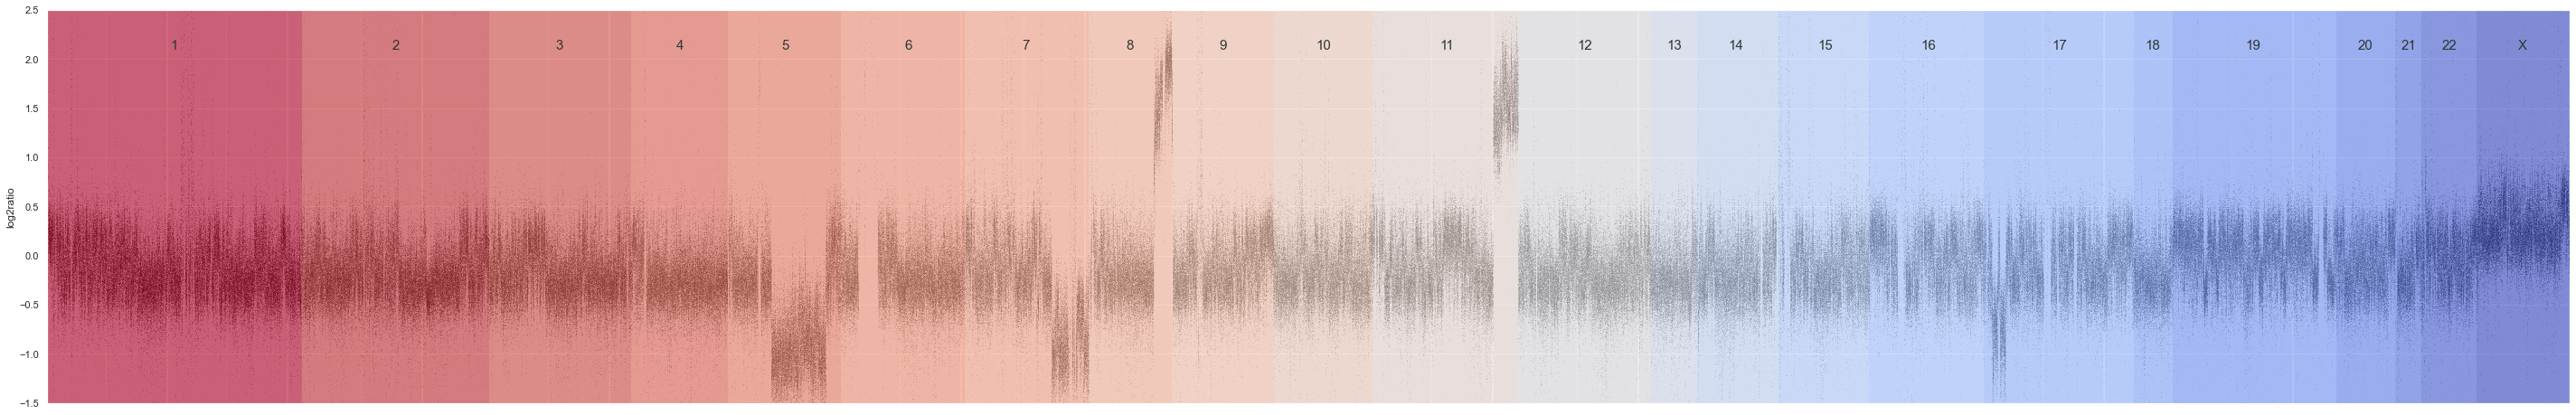

In [96]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.3
        )
    )

plots = [log2]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms='all', region='', **fig_params)

#### zoom in on interesting feats

DEBUG 12059269


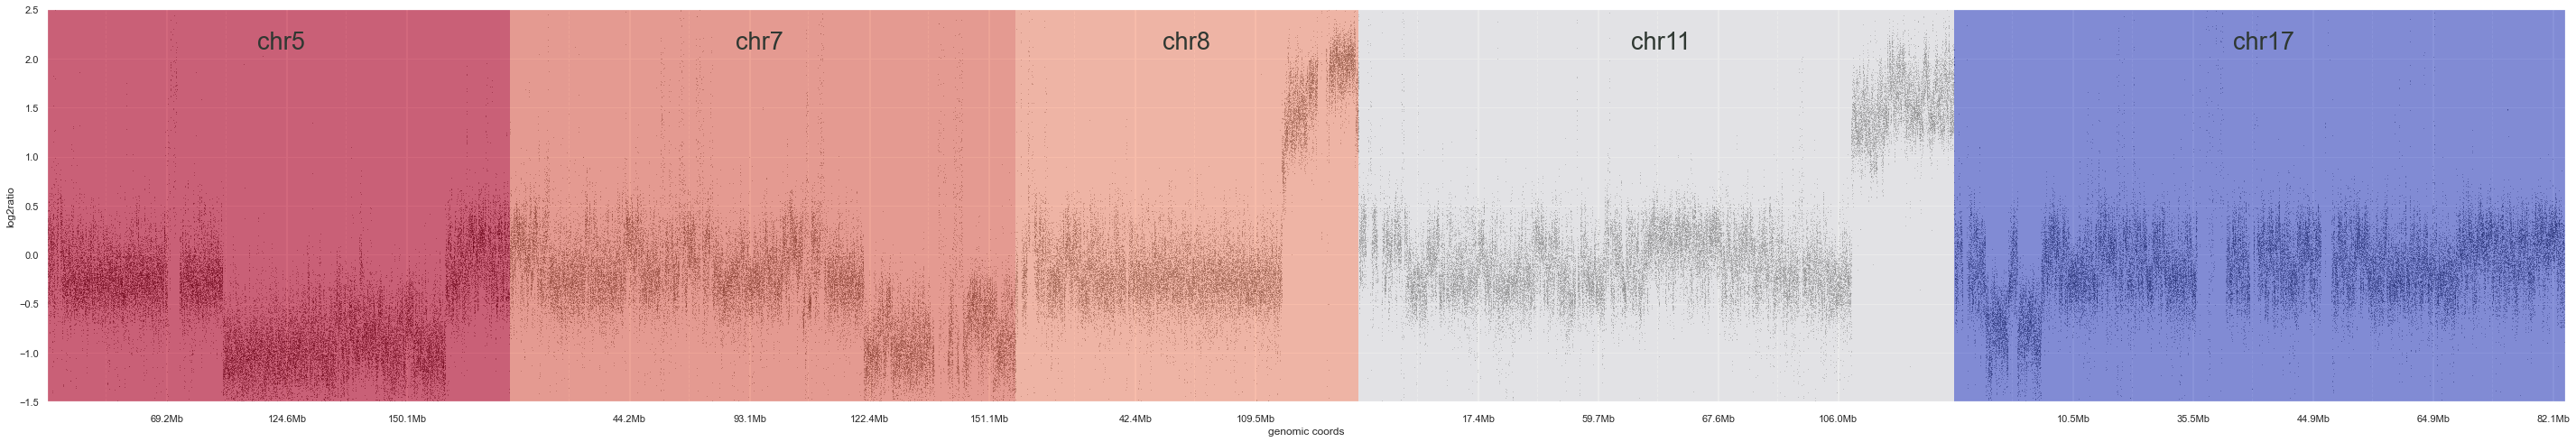

In [97]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        ))

plots = [
    log2
]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region='', **fig_params)

In [98]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.4,
            alpha=1
        ))

plots = [
    log2
]

fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region='chr17', **fig_params)

DEBUG 2929939


In [99]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=2,
            alpha=1
        ))
plots = [
    log2
]
r1 = 'chr17:3Mb-9Mb'
fig, ax, df, chrom_df = plot_genomic(cov_df, plots=plots, chroms=chroms, region=r1, **fig_params)

DEBUG 415752


## rolling window for log2ratio
#### compute the mean for log2ratio
+ this is all done on chromosome-basis
+ the rolling should be performed on coverage data filtered for:
    * minimal coverage
    * minimal coverage in PON samples
    * maximal std of PON coverage

In [110]:
def interpolate(df, data_col, ref_col='FullExonPos', expand_limit=20):
    cols = list(df.columns)
    # set FullExonPos as index for the interpolation method to work on proper intervals
    df = df.set_index(ref_col)
    df.loc[:,data_col] = df[data_col].interpolate(method='values', limit=expand_limit, limit_direction='both')
    return df.reset_index()[cols]


def one_col_rolling(df, df_filter, col, agg, window_size=200, expand_limit=20, normalize=False, debug=False):
    '''
    performs rolling computation of <agg> on data column <col> with given window size
    the aggregation has to be a string expression understood by the agg-function of the pandas.groupby API
    computation is performed on a left and right rolling window
    missing margins are filled by the counterpart window function
    a diff column is included ()
    
    '''
    
    org_cols = list(df.columns)
    # rolling left
    # get the right computation by passing agg to .agg()
    # only this allows passing methods as string
    df.loc[:,'L'] = df_filter[col].rolling(window_size).agg(agg)
    # rolling right by shifting the L column
    df.loc[:, 'R'] = df.shift(-window_size + 1)['L']
    
    
    col_name = col + agg
    diff_name = col_name + "Diff"
    new_cols = org_cols +[col_name, diff_name]
    if debug:
        new_cols += [f'{col_name}L', f'{col_name}R']
    # skips interpolation if value == 0
    if interpolate:
        # interpolate missing values
        for c in ['L', 'R']:
            df = interpolate(df, c, expand_limit=expand_limit)
    # fill the margins
    L_margin = df['L'].first_valid_index()
    df.loc[:L_margin, 'L'] = df['R']
    R_margin = df['R'].last_valid_index() + 1
    df.loc[R_margin:, 'R'] = df['L']
    
    # normalize values 
    # should be only used for sum aggregations
    if normalize and agg == 'sum':
    # normalize the data
        print('Normalizing data')
        _min = df['L'].min()
        _max = df['L'].max()
        for c in ['L', 'R']:
            df.loc[:,c] = (df[c] - _min) / (_max - _min)
            
    # get the Diff
    df.loc[:,diff_name] = np.abs(df['R'] - df['L'])
    # normalize to max
    df.loc[:,diff_name] = df[diff_name] / df[diff_name].max()
    # here, contribution of L and R is controlled by diff value
    df.loc[:,col_name] = df['R'] * df[diff_name] + df['L'] * (1 - df[diff_name])
    
    # square the diff
    df.loc[:,diff_name] = df[diff_name] ** config['diff_exp']
    
    # reduce to the right columns
    df = df.rename(columns=dict(L=f'{col_name}L', R=f'{col_name}R'))
    return df[new_cols]
    

def rolling_coverage(cov_df, config):
    '''
    cycle through the chroms and perform rolling window computations of data set in config
    '''
    
    # split the params dict for easier access
    params = config['coverage']
    filter_params = params['filter']
    data_params = params['data']
    # get the params for filtering
    min_cov = filter_params['min_cov']
    min_PON_cov = filter_params['min_PON_cov']
    max_PON_std = filter_params['max_PON_std']
    
    chrom_dfs = []
    for chrom in cov_df['Chr'].unique():
        # restrict to chrom
        chrom_df = cov_df.query('Chr == @chrom').sort_values('FullExonPos')
        # filter df
        filter_df = chrom_df.query('Coverage >= @min_cov and PONmeanCov >= @min_PON_cov and PONstd < @max_PON_std')
        for data_col in data_params.keys():
            for agg in data_params[data_col].keys():
                window_size = data_params[data_col][agg]
                expand_limit = int(params['expand'] * window_size)
                # print(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_df, data_col, agg, window_size=window_size, expand_limit=expand_limit, normalize=params['normalize'], debug=config['debug'])
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    return df

In [111]:
config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'diff_exp': 4, # the exponent for the diff function --> higher values make steeper peaks
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 40,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':250
            }
        }
    }
}

df = rolling_coverage(cov_df, config)
df[:10]

Chr    Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  PONmedianCov  \
0  chr1  12600          170      170   0.000000    0.000000      0.000000   
1  chr1  12650          220      220   0.103468    0.007240      0.000000   
2  chr1  12700          270      270   0.232804    0.029561      0.000000   
3  chr1  12750          320      320   0.615638    0.015033      0.000000   
4  chr1  13450          365      365  21.384350   11.320374     10.811050   
5  chr1  13500          415      415  27.587286   15.962807     15.962807   
6  chr1  13550          465      465  32.023497   19.287508     20.464653   
7  chr1  13600          515      515  31.777760   18.749634     20.410905   
8  chr1  13650          565      565  26.436199   14.398396     14.753900   
9  chr1  14700          606      606  28.078761   15.564975     15.329403   

     PONstd  log2ratio  log2ratiomean  log2ratiomeanDiff  log2ratiomeanL  \
0  0.000000        NaN            NaN                NaN             NaN   
1  0.024945   3.836977            NaN                NaN             NaN   
2  0.081585   2.977339            NaN                NaN             NaN   
3  0.049342   5.355868            NaN                NaN             NaN   
4  5.101879   0.917634            NaN                NaN             NaN   
5  6.725165   0.789289            NaN                NaN             NaN   
6  8.205055   0.731464            NaN                NaN             NaN   
7  8.141875   0.761155            NaN                NaN             NaN   
8  6.366938   0.876607            NaN                NaN             NaN   
9  5.824112   0.851176            NaN                NaN             NaN   

   log2ratiomeanR  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
8             NaN  
9             NaN

In [112]:
########### CONFIG ##################
# put all the parameters for the rolling into a dict
# needs to contain:
# - filter criteria for the data to be used for rolling
# - the actual data columns with
#   - and interpolation size
config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'diff_exp': 4, # the exponent for the diff function --> higher values make steeper peaks
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 40,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':250
            }
        }
    }
}

cov2_df = rolling_coverage(cov_df, config)
cov2_df

Chr        Pos  FullExonPos  ExonPos   Coverage  PONmeanCov  \
0      chr1      12600          170      170   0.000000    0.000000   
1      chr1      12650          220      220   0.103468    0.007240   
2      chr1      12700          270      270   0.232804    0.029561   
3      chr1      12750          320      320   0.615638    0.015033   
4      chr1      13450          365      365  21.384350   11.320374   
...     ...        ...          ...      ...        ...         ...   
35235  chrX  156027400     49470607  1836144  15.334030   20.261955   
35236  chrX  156027450     49470657  1836194  11.316866   14.305725   
35237  chrX  156027800     49470677  1836214   1.774485    1.016103   
35238  chrX  156027850     49470727  1836264   2.053850    1.409153   
35239  chrX  156027900     49470777  1836314   1.477013    1.353497   

       PONmedianCov     PONstd  log2ratio  log2ratiomean  log2ratiomeanDiff  \
0          0.000000   0.000000        NaN            NaN                NaN   
1          0.000000   0.024945   3.836977            NaN                NaN   
2          0.000000   0.081585   2.977339            NaN                NaN   
3          0.000000   0.049342   5.355868            NaN                NaN   
4         10.811050   5.101879   0.917634            NaN                NaN   
...             ...        ...        ...            ...                ...   
35235     20.360733  10.177341  -0.402036       0.070397                0.0   
35236     13.579958   8.899561  -0.338118       0.070397                0.0   
35237      1.038660   0.716335   0.804354       0.070397                0.0   
35238      1.461291   0.968240   0.543502       0.070397                0.0   
35239      1.351760   0.917159   0.125990       0.070397                0.0   

       log2ratiomeanL  log2ratiomeanR  
0                 NaN             NaN  
1                 NaN             NaN  
2                 NaN             NaN  
3                 NaN             NaN  
4                 NaN             NaN  
...               ...             ...  
35235        0.070397        0.070397  
35236        0.070397        0.070397  
35237        0.070397        0.070397  
35238        0.070397        0.070397  
35239        0.070397        0.070397  

[955615 rows x 13 columns]

In [113]:
log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )


log2diff = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanDiff',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        ))

log2L = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanL',
        plot_args=dict(
            linewidth=1,
            color='white',
            alpha=.7
        ))

log2R = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomeanR',
        plot_args=dict(
            linewidth=1,
            color='black',
            alpha=.7
        ))

plots = [
    log2,
    log2mean
]

_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms='all', region='', **fig_params)

DEBUG 49459155


DEBUG 12059269


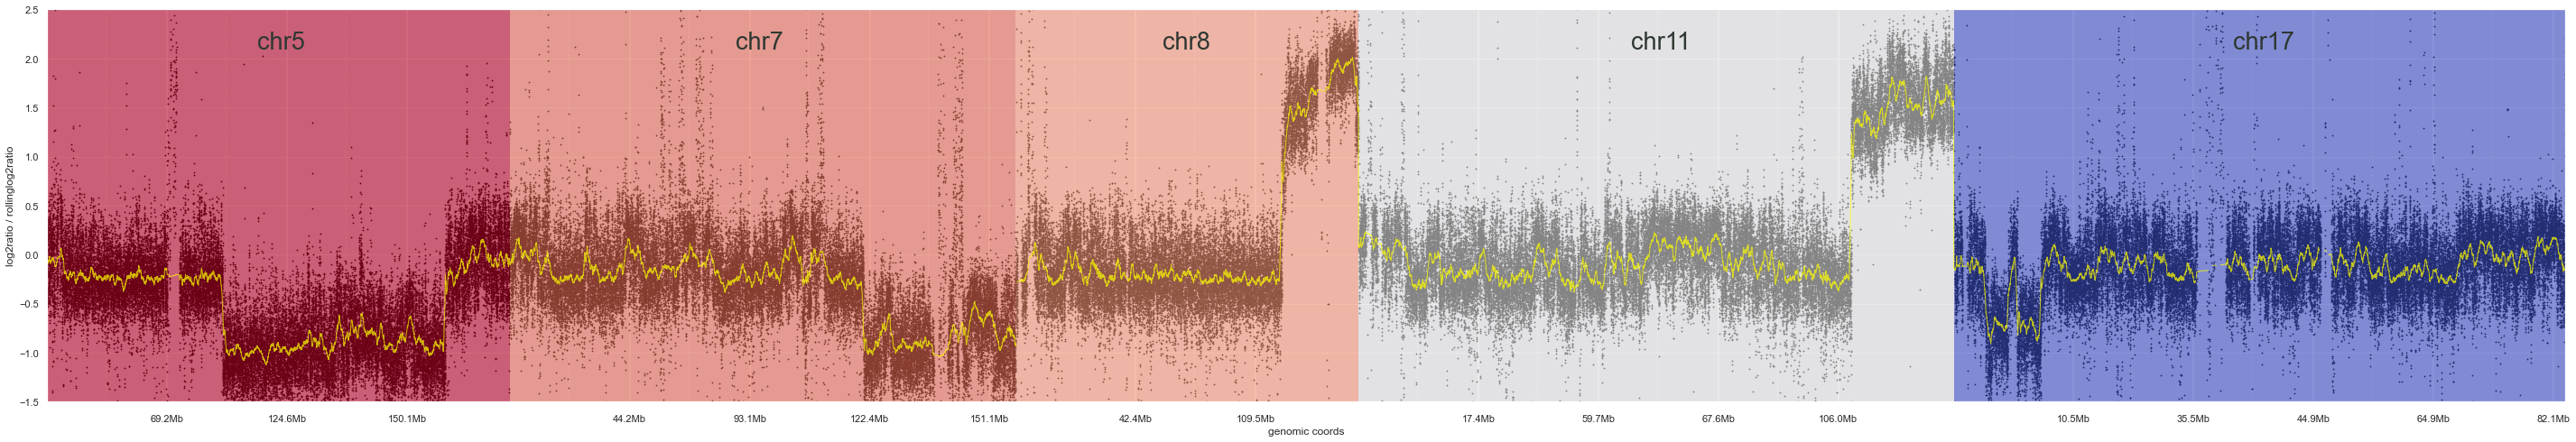

In [114]:
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='', **fig_params)

DEBUG 2929939


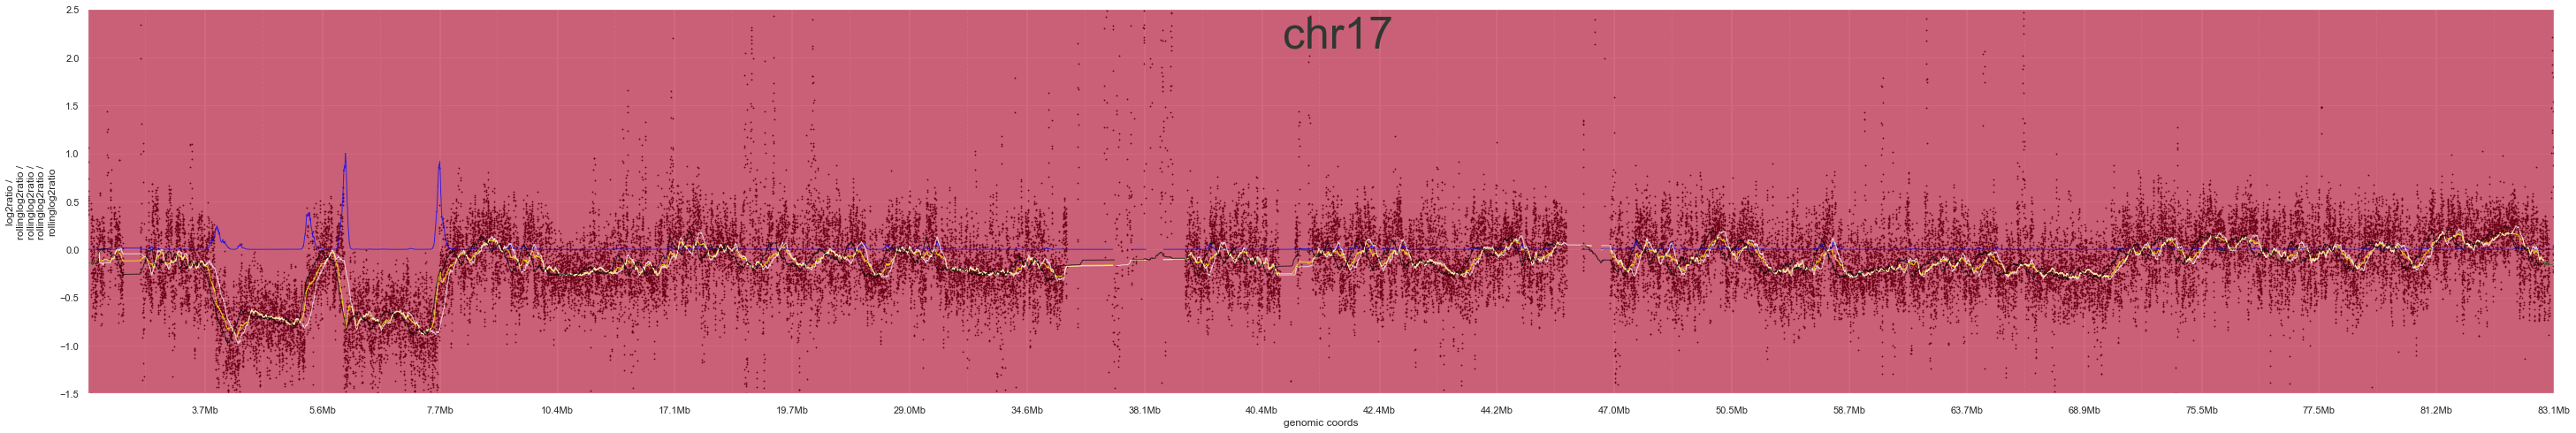

In [115]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]

_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='chr17', **fig_params)

DEBUG 415752


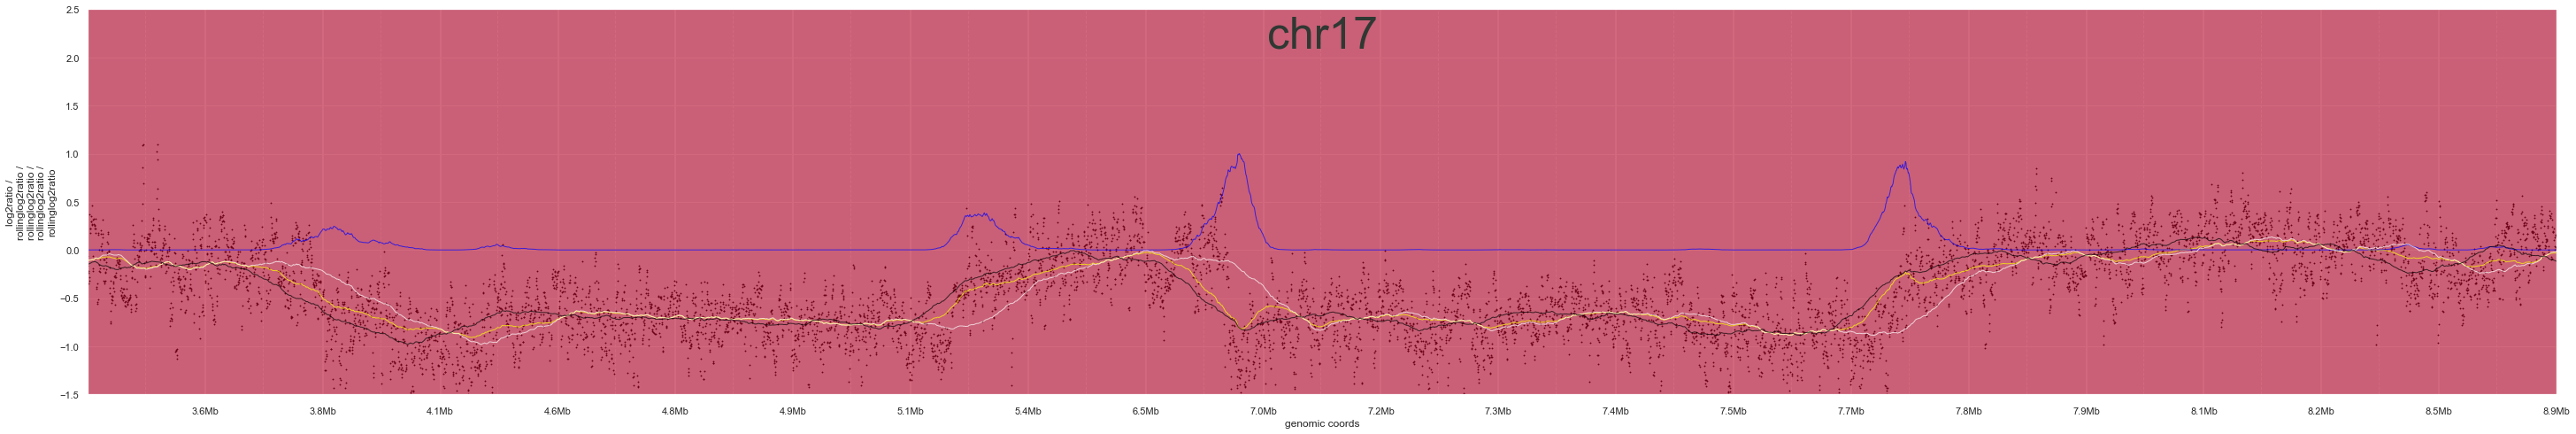

In [116]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]


_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region=r1, **fig_params)

### test different window sizes for log2ratio

DEBUG 2929939


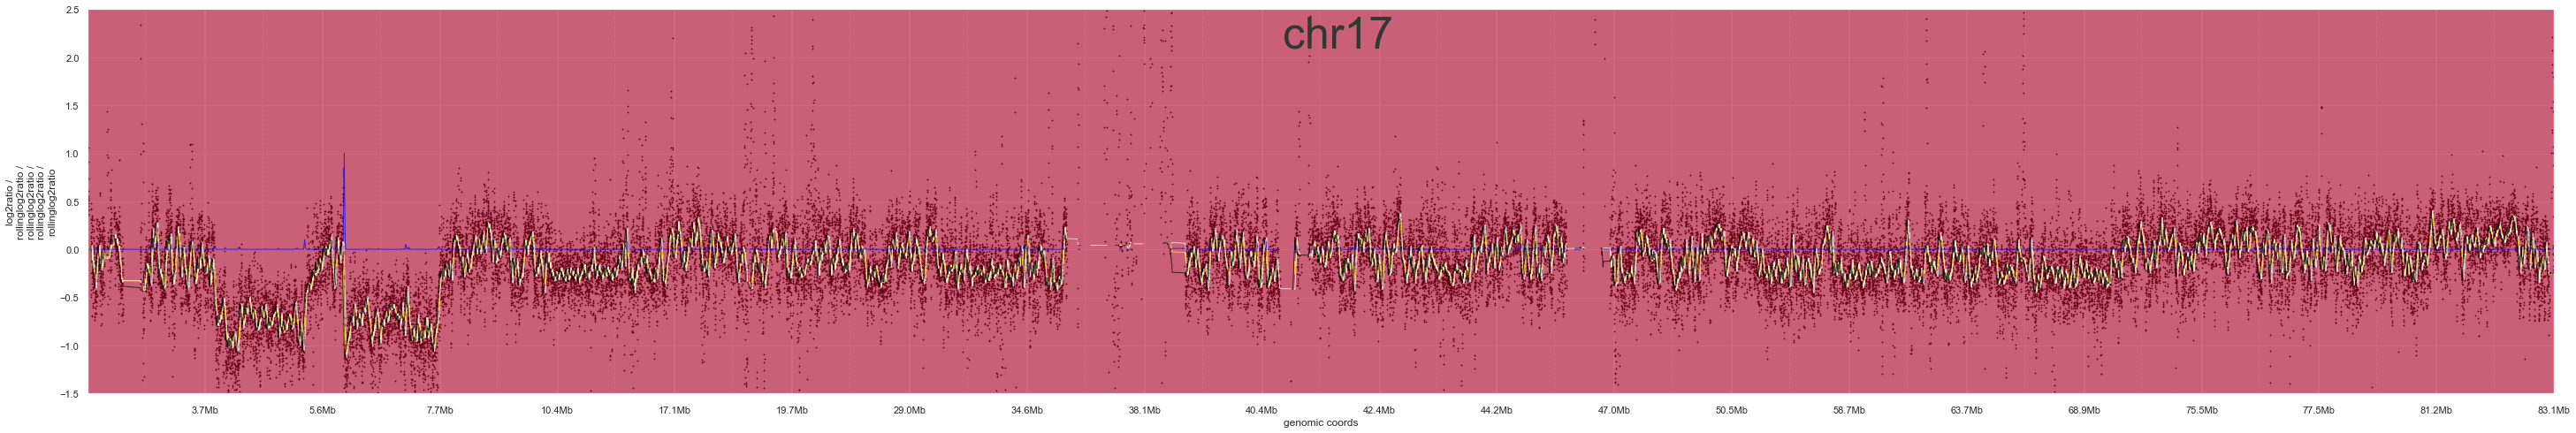

In [117]:
plots = [
    log2,
    log2mean,
    log2diff,
    log2L,
    log2R
]

# this is only part of the config - snp config is omitted
config = {
    'debug': True, # also export the left and right rolling window values (L/R)
    'diff_exp': 4, # the exponent for the diff function --> higher values make steeper peaks
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 40,
            max_PON_std = 100,
        ),
        'normalize':False,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':50
            }
        }
    }
}


cov2_df = rolling_coverage(cov_df, config)
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region='chr17', **fig_params)

DEBUG 415752


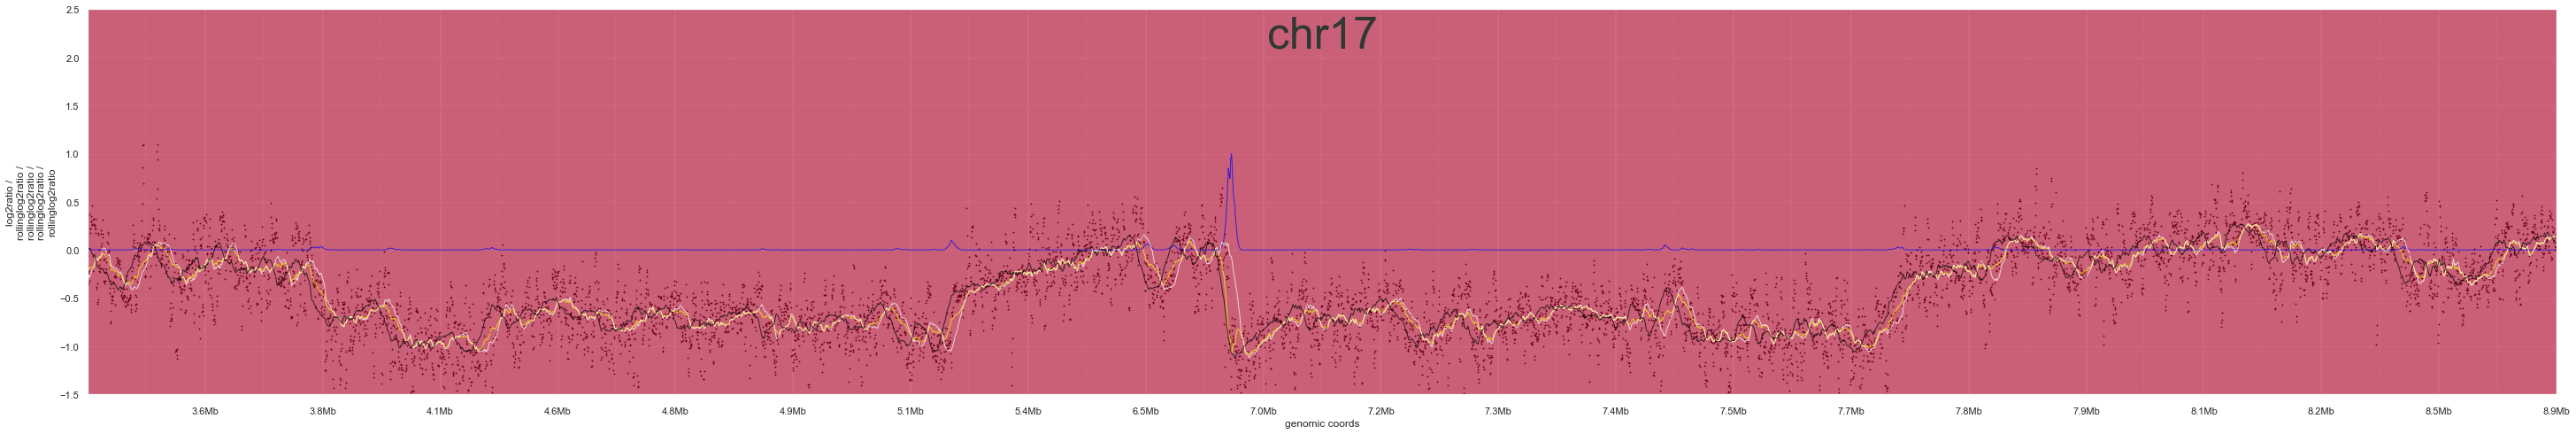

In [118]:
_, _, _, _ = plot_genomic(cov2_df, plots=plots, chroms=chroms, region=r1, **fig_params)

## merge coverage data into SNP
+ reduce to important columns

In [119]:
def interpolate_fullexonpon(merge_df):
    chrom_dfs = []
    for chrom in merge_df['Chr'].unique():
        chrom_df = merge_df.query('Chr == @chrom')
        chrom_df = interpolate(chrom_df, 'FullExonPos', ref_col='Pos', expand_limit=1000000)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    df.loc[:, 'FullExonPos'] = df['FullExonPos'].astype(int)
    return df


def mergeSNPnCov(cov_df, snp_df):
    
    # reduce the data to important columns
    # snp
    snp_keep_cols = list(snp_df.columns)[:3] + ['Depth', 'EBscore', 'VAF']
    snp_df = snp_df.loc[:, snp_keep_cols]
    # cov
    cov_keep_cols = list(cov2_df.columns)[:4] + ['log2ratiomean', 'log2ratiomeanDiff']
    cov_df = cov_df.loc[:, cov_keep_cols]
    
    # merge the data
    merge_df = cov_df.merge(snp_df, on=list(snp_df.columns[:3]), how='outer')
    
    # interpolate FullExonPos
    merge_df = interpolate_fullexonpon(merge_df)

    # interpolate the data
    for col in [col for col in merge_df.columns if 'log2ratio' in col]:
        merge_df = interpolate(merge_df, col, expand_limit=100)
    # reduce to VAF values
    snpcov_df = merge_df.query('VAF == VAF')
    cov_df = cov_df.query('log2ratiomean == log2ratiomean')
    return snpcov_df, cov_df

In [ ]:
merge_df, _ = mergeSNPnCov(cov2_df, snp_df)
merge_df.query('FullExonPos != FullExonPos')

In [ ]:
# non-fitters are greatly reduced
merge_df.query('log2ratiomean != log2ratiomean')

### bring it all together

In [ ]:
def apply_rolling_coverage(snp_df, cov_df, config):
    '''
    master function for rolling coverage
    '''
    
    cov_df = rolling_coverage(cov_df, config)
    
    snpcov_df, rolling_cov_df = mergeSNPnCov(cov_df, snp_df)
    
    return snpcov_df, rolling_cov_df

In [ ]:
snpcov_df, rolling_cov_df = apply_rolling_coverage(snp_df, cov_df, config)

In [ ]:
snpcov_df

In [ ]:
rolling_cov_df

In [ ]:
vaf = dict(
        title='VAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=5,
            alpha=1
        ))

In [ ]:
_, _, _, _ = plot_genomic(snpcov_df, plots=[log2mean, vaf], chroms=chroms, region='', **fig_params)